In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('bike_sharing.csv')
data.shape

(10886, 12)

In [5]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [7]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [45]:
data['datetime'] =  pd.to_datetime(data['datetime'])

In [46]:
data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [12]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [15]:
data['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [17]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [19]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [47]:
#missing values
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

###### Working Day has effect on number of electric cycles rented - T Test 

In [48]:
# Specify the samples which needs to be used for given hypothesis
var1 = data[data['workingday']==1]['count']
var2 = data[data['workingday']==0]['count']

In [49]:
var1.shape

(7412,)

In [50]:
var2.shape

(3474,)

###### Setting up Null Hypothesis and Alternate Hypothesis 
H0 : mean of working day is equal to mean of non working day

H1 : mean of working day is not equal to mean of non working day

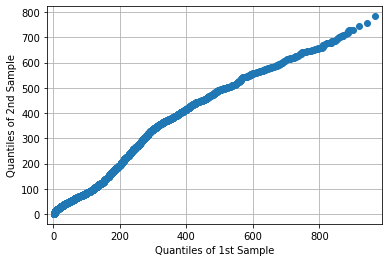

In [53]:
#QQPlot to check normality.
from statsmodels.graphics.gofplots import qqplot_2samples
qqplot_2samples(var1, var2)
plt.grid()

The given observations follows normal distribution

In [34]:
# Test statistic for T test
stats.ttest_ind(var1, var2)

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

By comparing pvalue of 0.2264 with significance level of 0.05, we fail to reject null hypothesis.

There is not much depedency of working day on number of electric cycles rented.

###### No. of cycles rented similar or different in different seasons - ANNOVA
###### No. of cycles rented similar or different in different weather - ANNOVA

###### setting up Null Hypothesis and Alternate Hypothesis for season
H0 : mean of all the seasons are equal

H1 : mean of all the seasons are not equal

###### setting up Null Hypothesis and Alternate Hypothesis for weather
H0 : mean of all weathers are equal

H1 : mean of all weathers are not equal

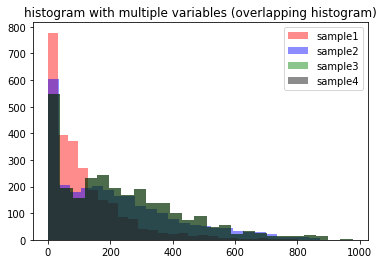

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)


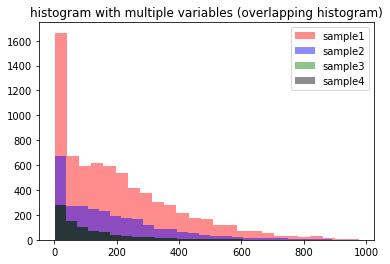

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)


In [61]:
# Test Statistics and P-Value for ANNOVA tests
vars = ['season', 'weather']
for var in vars:
    an_var1 = data[data[var]==1]['count']
    an_var2 = data[data[var]==2]['count']
    an_var3 = data[data[var]==3]['count']
    an_var4 = data[data[var]==4]['count']
    plt.hist(an_var1, bins=25, alpha=0.45, color='red')
    plt.hist(an_var2, bins=25, alpha=0.45, color='blue')
    plt.hist(an_var3, bins=25, alpha=0.45, color='green')
    plt.hist(an_var3, bins=25, alpha=0.45, color='black')
    
    plt.title("histogram with multiple variables (overlapping histogram)")
  
    plt.legend(['sample1', 'sample2', 'sample3', 'sample4'])
    plt.show()
    print(stats.f_oneway(an_var1, an_var2, an_var3, an_var4))

As pvalue for both season and weather are less than signicance value of 0.05, we can reject null hypothesis.

Number of cycle rented will be different in different seasons and in different weather.

###### Weather is dependent on season - Chi Square Test

###### Setting up Null Hypothesis and Alternate Hypothesis
H0 : weather is independent on season

H1 : weather is dependent on season

In [54]:
# Observed data for chi square test
observed = pd.crosstab(data['season'], data['weather'], margins=True)

In [55]:
observed

weather,1,2,3,4,All
season,,,,,
1,1759,715,211,1,2686
2,1801,708,224,0,2733
3,1930,604,199,0,2733
4,1702,807,225,0,2734
All,7192,2834,859,1,10886


In [43]:
# Test statistics, pvalue and degree of freedom
# Expected values to be compare with Observed for test statistics and pvalue of chi-square test.
stats.chi2_contingency(observed= observed)

(49.15865559689363,
 3.1185273325126814e-05,
 16,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01,
         2.68600000e+03],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01,
         2.73300000e+03],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01,
         2.73300000e+03],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01,
         2.73400000e+03],
        [7.19200000e+03, 2.83400000e+03, 8.59000000e+02, 1.00000000e+00,
         1.08860000e+04]]))

pvalue is less than significance value of 0.05, thus we can reject null hypothesis.

As per the hypothesis, weather is very much dependent on season